In [1]:
import numpy as np
import wisps
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm
%matplotlib inline

In [2]:
import wisps.simulations as wispsim

In [3]:
vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='saumon2008')
#vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='marley2019')
#vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='baraffe2003')

In [67]:
#MIX MY COLORMAP WITH COOOLWARM 
colors1 = plt.cm.coolwarm(np.linspace(0., 1, 256))
colors2=plt.cm.YlOrBr(np.linspace(0., 1, 256))
colors = np.vstack((colors1+colors1+colors2)/3)
import matplotlib.colors as mcolors
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [68]:
mymap

In [57]:
def plot_grid(model, ax):
    model_filename=wispsim.EVOL_MODELS_FOLDER+'//'+model.lower()+'.csv'
    evolutiomodel=pd.read_csv( model_filename)
    mp=ax.scatter(np.log10(evolutiomodel.mass), np.log10(evolutiomodel.age), 
                  c=evolutiomodel.temperature, vmin=200, vmax=3100, cmap=mymap, marker='*', s=200)
    return mp

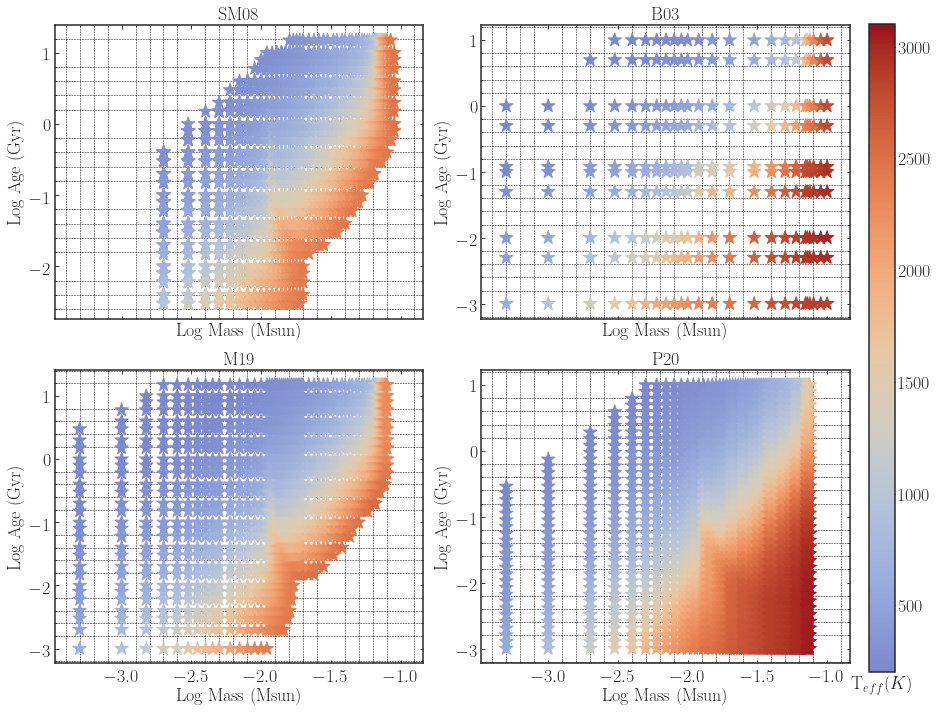

In [85]:
fig, ax=plt.subplots(ncols=2,nrows=2, sharex=True, figsize=(12, 10))

plot_grid('saumon2008', ax[0][0])
mp=plot_grid('baraffe2003', ax[0][1])
plot_grid('marley2019', ax[1][0])
plot_grid('phillips2020', ax[1][1])

ax[0][0].set_title('SM08', fontsize=18)
ax[0][1].set_title('B03', fontsize=18)
ax[1][0].set_title('M19', fontsize=18)
ax[1][1].set_title('P20', fontsize=18)

for a in np.concatenate(ax):
    a.set_xlabel(r'Log Mass (Msun)', fontsize=18)
    a.set_ylabel(r' Log Age  (Gyr)', fontsize=18)
    a.minorticks_on()
    a.grid(which='minor')

cax = fig.add_axes([1.01, 0.06, .03, 0.9])
cbar=plt.colorbar(mp, cax=cax, orientation='vertical')
cbar.ax.set_xlabel(r'T$_{eff} (K) $', fontsize=18)
    
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/model_grids.pdf',  rasterized=True, bbox_inches='tight')

In [7]:
ax[0][0].grid

<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x1a5e2f4390>>

In [8]:
ts=((vs['prim_evol'])['temperature']).value
ms=((vs['prim_evol'])['mass']).value
ags=((vs['prim_evol'])['age']).value

In [9]:
spts=wisps.splat_teff_to_spt(ts)

In [10]:
nans=np.isnan(spts)

In [11]:
len(spts[nans])/len(spts)

0.232967

In [12]:
brf=wispsim.simulate_spts(recompute=False, name="baraffe2003")

In [13]:
brf.keys()

dict_keys(['sing_evol', 'sing_spt', 'prim_evol', 'prim_spt', 'sec_evol', 'sec_spt', 'binary_spt'])

In [14]:
m0=(brf['sing_evol'])['mass']
m1=(brf['prim_evol'])['mass']
m2=(brf['sec_evol'])['mass']

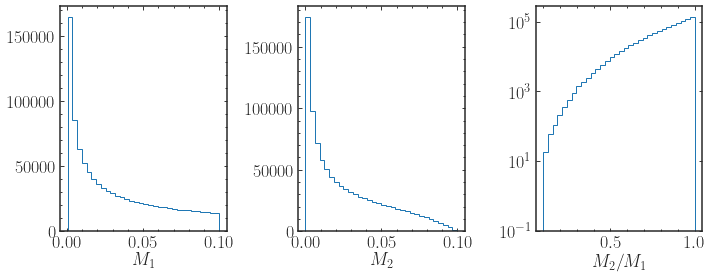

In [15]:
fig, ax=plt.subplots(ncols=3, figsize=(10, 4))
h=ax[0].hist(m1.value, bins=32, histtype='step', normed=False, log=False)
h=ax[1].hist(m2.value, bins=32, histtype='step', normed=False, log=False)
h=ax[2].hist((m2/m1).value, bins=32, histtype='step', normed=False, log=True)




ax[0].set_xlabel(r'$M_1$', fontsize=18)
ax[1].set_xlabel(r'$M_2$', fontsize=18)
ax[2].set_xlabel(r'$M_2/M_1$', fontsize=18)
plt.tight_layout()

for a in ax:
    a.minorticks_on()
plt.savefig(wisps.OUTPUT_FIGURES+'/mass_ratios.pdf')

In [16]:
x=np.round(np.array(brf['prim_spt']), decimals=0)
y=np.around(np.array(brf['sec_spt']), decimals=0)

In [17]:
len(x[np.isnan(x)])/len(x), len(y[np.isnan(y)])/len(y)

(0.08039, 0.099384)

In [18]:
xy=np.vstack([x, y]).T

In [19]:
vals=wispsim.get_system_type(x, y) 

In [20]:
nans=np.isnan(vals)

In [21]:
len(vals[nans])/len(vals)

0.476

In [22]:
'ha'

'ha'

In [23]:
def my_limit(spts):
    idx=np.logical_and((spts>= 17), (spts <=40))
    return spts[idx]

In [24]:
#custom_histogram(teffs_bar, teffgrid, 150)*normteff_bar
spgrid=np.arange(17, 40, 5)

In [25]:
import seaborn as sns
#flatui =['#001f3f', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00']
sns.set_palette(sns.color_palette("cubehelix", 18))

In [26]:
def bin_by_spt_bin(sp_types, number):
    ranges=[[17, 20], [20, 25], [25, 30], [30, 35], [35, 40]]
    numbers=[]
    for r in ranges:
        idx= np.logical_and((r[0]<=sp_types), (r[1]>sp_types))
        numbers.append(np.nansum(number[idx]))
    return numbers

In [27]:
vls=wispsim.simulate_spts()

In [28]:
def get_values(model, b):
    b=round(b, 1)
    
    syst=wispsim.make_systems(model_name=model, bfraction=b)
    
    sps=(syst['system_spts'])

    vls0=len(sps[np.logical_and(sps>=27, sps<32)])
    vls1=len(sps)
    
    return vls0/vls1
    

In [29]:
import dask

In [30]:
binfr=np.arange(0.01, 0.9,0.01)


lt_fract=[]
for b in binfr:
    lt_fract.append([ get_values('saumon2008', b), get_values('baraffe2003', b),  
                     get_values('marley2019', b), get_values('phillips2020', b)])


In [31]:
lt_fract=np.array(lt_fract)

In [61]:
import seaborn as sns
sns.set_palette(sns.color_palette('tab10', 20))

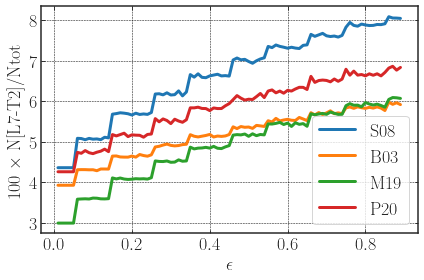

In [84]:
fig, ax=plt.subplots()
plt.plot(binfr, lt_fract[:,0]*100, label='S08', linewidth=3)
plt.plot(binfr, lt_fract[:,1]*100, label='B03', linewidth=3)
plt.plot(binfr, lt_fract[:,2]*100, label='M19', linewidth=3)
plt.plot(binfr, lt_fract[:,3]*100, label='P20', linewidth=3)

plt.legend(fontsize=18)
plt.grid()
plt.xlabel(r'$\epsilon$', fontsize=18)
plt.ylabel(r'100 $\times$ N[L7-T2]/Ntot', fontsize=18)
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/binary_effects.pdf')

In [34]:
vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='saumon2008')